Rajeev Kumar_CH22M026

# Problem Statement:

Customer Behaviour and it’s prediction lies at the core of every Business Model. From Stock Exchange, e-Commerce and
Automobile to even Presidential Elections, predictions serve a great purpose. Most of these predictions are based on the data
available about a person’s activity either online or in-person.
Recommendation Engines are the much
needed manifestations of the desired
Predictability of User Activity.
Recommendation Engines move one step
further and not only give information but
put forth strategies to further increase users
interaction with the platform. In today’s world OTT platform and Streaming
Services have taken up a big chunk in the
Retail and Entertainment industry.
Organizations like Netflix, Amazon etc.
analyse User Activity Pattern’s and suggest
products that better suit the user needs and
choices. For the purpose of this Project we will be
creating one such Recommendation Engine
from the ground-up, where every single user,
based on there area of interest and ratings,
would be recommended a list of movies that
are best suited for them.

# Dataset Information:

1. ID – Contains the separate keys for
customer and movies.

2. Rating – A section contains the user
ratings for all the movies.

3. Genre – Highlights the category of the
movie.

4. Movie Name – Name of the movie with
respect to the movie id.

# Objective:

1. Find out the list of most popular and liked genre.

2. Create Model that finds the best suited Movie for one
user in every genre.

3. Find what Genre Movies have received the best and
worst ratings based on User Rating.

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
# def read_file(file_path):
#     try:
#         with open(file_path, 'r') as file:
#             content = file.readlines()
#         return content
#     except FileNotFoundError:
#         print(f"File '{file_path}' not found.")
#         return None
#     except IOError:
#         print(f"Error reading file '{file_path}'.")
#         return None

# # Example usage
# file_path = r'C:\Users\rajee\Desktop\DS\Int\CP\combined_data_1.txt'
# file_content = read_file(file_path)

# if file_content:
#     print("File content:")
#     for line in file_content[:10]:
#         print(line.strip())

File content:
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26
823519,3,2004-05-03
893988,3,2005-11-17
124105,4,2004-08-05
1248029,3,2004-04-22
1842128,4,2004-05-09


In [2]:
dataset = pd.read_csv("C:\\Users\\rajee\\Desktop\\DS\\Int\\CP\\Dataset_CP\\Netflix.csv")
dataset.head()

,Cust_Id,Rating,Movie_Id,Genre,MovieName
0,1488844,3,1,Action,Dinosaur Planet
1,822109,5,1,Action,Dinosaur Planet
2,885013,4,1,Action,Dinosaur Planet
3,30878,4,1,Action,Dinosaur Planet
4,823519,3,1,Action,Dinosaur Planet


In [3]:
# Convert Ratings column to a float
dataset['Rating'] = pd.DataFrame(dataset['Rating'].astype(float))
dataset['Rating']

0          3.0
1          5.0
2          4.0
3          4.0
4          3.0
          ... 
1048569    4.0
1048570    3.0
1048571    5.0
1048572    3.0
1048573    4.0
Name: Rating, Length: 1048574, dtype: float64

In [4]:
# Check the data types of each column
print(dataset.dtypes)

Cust_Id        int64
Rating       float64
Movie_Id       int64
Genre         object
MovieName     object
dtype: object


In [5]:
dataset.shape

(1048574, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Cust_Id    1048574 non-null  int64  
 1   Rating     1048574 non-null  float64
 2   Movie_Id   1048574 non-null  int64  
 3   Genre      1047488 non-null  object 
 4   MovieName  1048574 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 40.0+ MB


In [7]:
## Desrciptive summary of the dataset
dataset.describe()

,Cust_Id,Rating,Movie_Id
count,1.048574e+06,1.048574e+06,1.048574e+06
mean,1.322763e+06,3.637297e+00,1.320276e+02
std,7.646631e+05,1.072757e+00,7.156683e+01
min,6.000000e+00,1.000000e+00,1.000000e+00
25%,6.609370e+05,3.000000e+00,5.700000e+01
50%,1.318946e+06,4.000000e+00,1.520000e+02
75%,1.985225e+06,4.000000e+00,1.910000e+02
max,2.649429e+06,5.000000e+00,2.410000e+02


In [8]:
# List down all the column names
dataset.columns

Index(['Cust_Id', 'Rating', 'Movie_Id', 'Genre', 'MovieName'], dtype='object')

In [9]:
# Check for missing values
print(dataset.isnull().sum())

Cust_Id         0
Rating          0
Movie_Id        0
Genre        1086
MovieName       0
dtype: int64


In [10]:
# Fill missing values with the mode
dataset['Genre'].fillna(dataset['Genre'].mode()[0], inplace=True)

In [11]:
# # Fill missing values with a specific category label
# dataset['Genre'].fillna('Unknown', inplace=True)

In [12]:
# Check for missing values
print(dataset.isnull().sum())

Cust_Id      0
Rating       0
Movie_Id     0
Genre        0
MovieName    0
dtype: int64


In [13]:
# Using indexing operator []
genre_column = dataset['Genre']
genre_column

0          Action
1          Action
2          Action
3          Action
4          Action
            ...  
1048569    Horror
1048570    Horror
1048571    Horror
1048572    Horror
1048573    Horror
Name: Genre, Length: 1048574, dtype: object

In [14]:
# # Using loc accessor
# genre_column = dataset.loc[:, 'Genre']
# genre_column

In [15]:
# # Using iloc accessor (if 'Genre' is the n-th column)
# n = 3  # Replace 'n' with the index of the 'Genre' column (starting from 0)
# genre_column = dataset.iloc[:, n]
# genre_column

<AxesSubplot:>

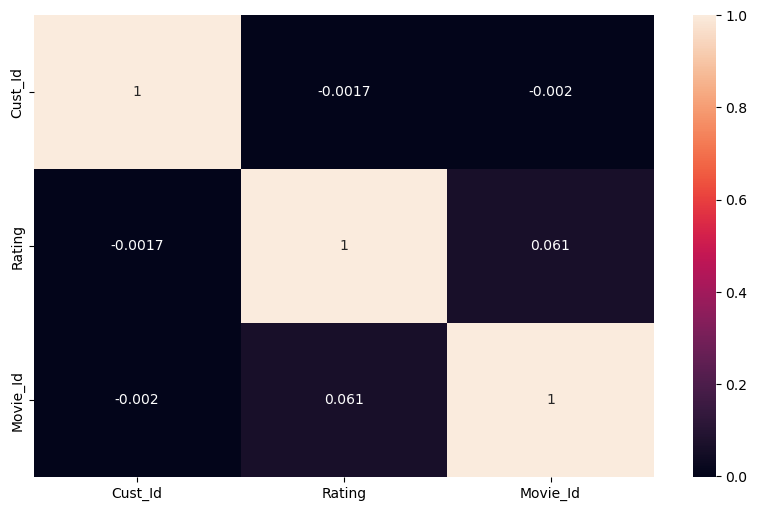

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

# Handling the outliers

In [17]:
# Take all columns into a single column "col"
col = list(dataset.columns)
col

['Cust_Id', 'Rating', 'Movie_Id', 'Genre', 'MovieName']

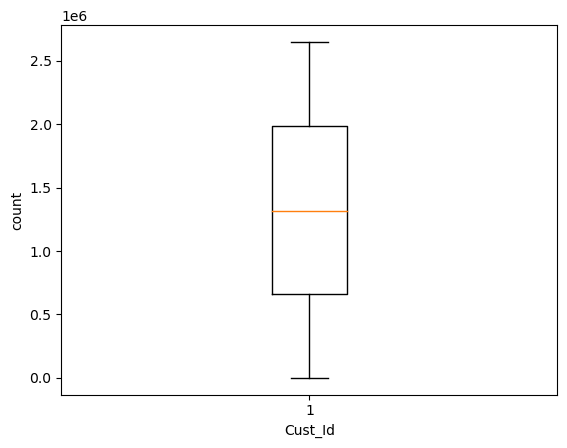

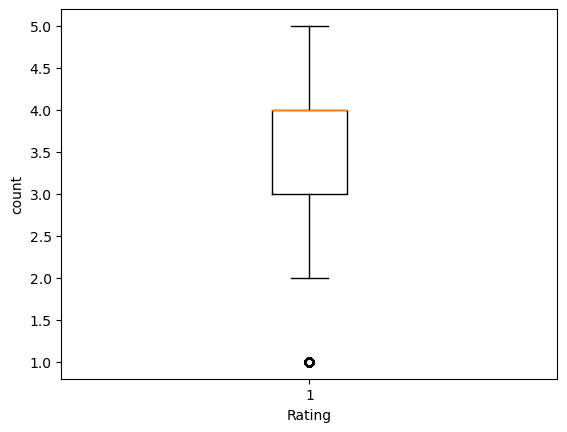

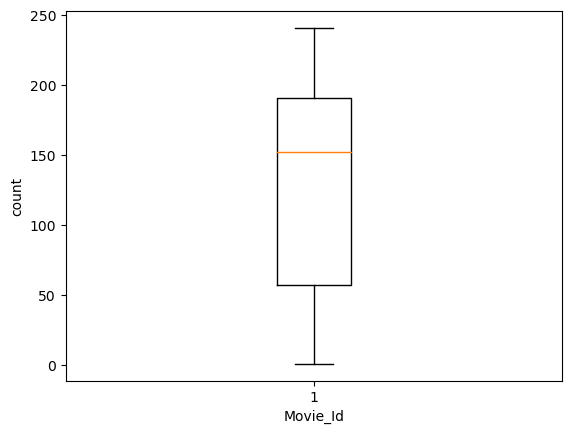

In [18]:
for col_name in col:
    if(dataset[col_name].dtypes == 'int64' or dataset[col_name].dtypes== 'float64'):
        plt.boxplot(dataset[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

# 1. Find out the list of most popular and liked genre

In [19]:
# Group the dataset by genre and calculate the average rating for each genre
genre_ratings = dataset.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

In [20]:
# Print the list of most popular and liked genres
print(genre_ratings)

Genre
Horror         4.123181
Educational    3.898523
Historical     3.818009
Action         3.749543
Crime          3.728872
Gang           3.680611
Animation      3.581107
Comedy         3.558621
Other          3.551541
Drama          3.496365
Sci-Fi         3.477920
Fan            3.465356
Biography      3.463439
Mystery        3.390731
RomCom         3.383633
Documentary    3.311661
War            3.288243
Fiction        3.084396
Thriller       3.073112
Romance        2.739437
Name: Rating, dtype: float64


# I can gain some insights about the popularity and likability of different genres. Here are some observations:

Horror movies have the highest average rating (4.123181), indicating that they are well-liked among the users in the dataset.

Educational movies come in second place with a relatively high average rating (3.898523), suggesting that users appreciate movies in this genre.

Historical movies also receive a decent average rating (3.818009), indicating that they are generally liked.

Action, Crime, and Gang genres have above-average ratings (ranging from 3.680611 to 3.749543), suggesting a positive reception among users.

Animation and Comedy genres have relatively good average ratings (3.581107 and 3.558621, respectively), indicating a favorable response from users.

Drama, Sci-Fi, and Fan genres fall in the middle range of ratings (ranging from 3.465356 to 3.496365), implying they are moderately liked by users.

Genres like Biography, Mystery, and RomCom also have average ratings above 3.4, indicating a reasonable level of appreciation.

Documentary, War, Fiction, Thriller, and Romance genres have lower average ratings (ranging from 2.739437 to 3.311661), suggesting that they may be less popular or less enjoyed by users in the dataset.

These insights can help you understand the relative popularity and likability of different genres based on the average ratings provided by the users in your dataset. It's important to note that these conclusions are specific to the dataset you are working with and may not necessarily reflect broader preferences or trends.

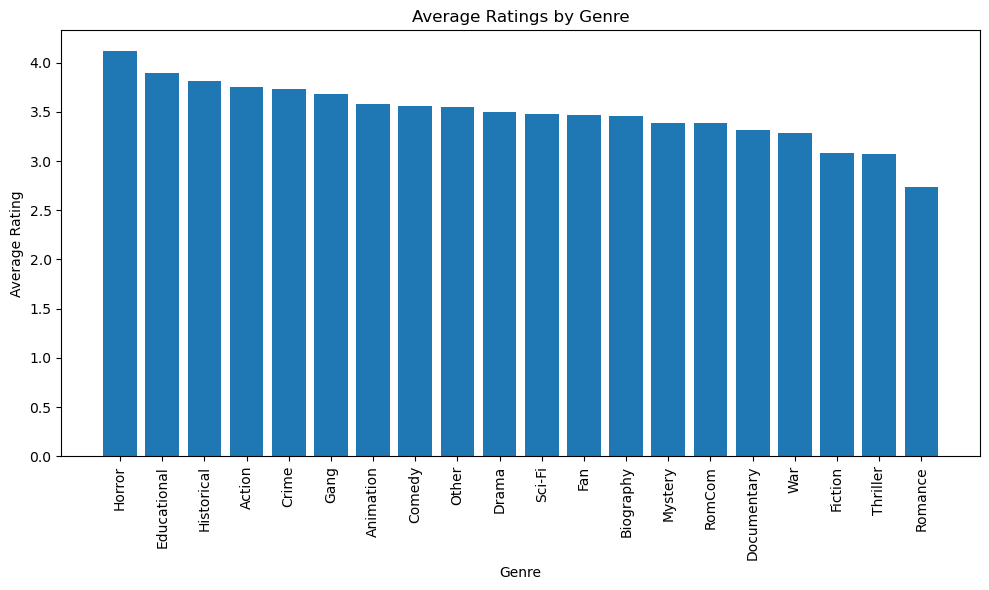

In [21]:
import matplotlib.pyplot as plt

# Create a bar plot of average ratings by genre
plt.figure(figsize=(10, 6))
plt.bar(genre_ratings.index, genre_ratings.values)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
f = ['count','mean']

In [23]:
dataset.groupby('Movie_Id').agg(f)

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
237          348  1.272902e+06    348  3.399425
238         2335  1.328057e+06   2335  3.678373
239         2190  1.345288e+06   2190  3.768037
240         5184  1.332201e+06   5184  3.948495
241        29259  1.318257e+06  29259  4.156328

[241 rows x 4 columns]

In [24]:
dataset.groupby('Movie_Id')['Rating'].agg(f)

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
237,348,3.399425
238,2335,3.678373
239,2190,3.768037


In [25]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.75),2)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] <= movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 2297.0


In [26]:
#calculate the thershold value of each customer,
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f)#f= count(), mean()
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.75),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 5.0


In [27]:
print(f'Original Shape: {dataset.shape}')

Original Shape: (1048574, 5)


In [28]:
drop_movie_list

Int64Index([  1,   2,   3,   4,   5,   6,   7,   9,  10,  11,
            ...
            228, 229, 230, 231, 233, 234, 235, 236, 237, 239],
           dtype='int64', name='Movie_Id', length=181)

In [29]:
drop_cust_list

Int64Index([     10,      25,      33,      42,      59,      94,      97,
                116,     131,     158,
            ...
            2649351, 2649370, 2649375, 2649376, 2649378, 2649388, 2649401,
            2649404, 2649409, 2649429],
           dtype='int64', name='Cust_Id', length=213138)

In [30]:
!pip install scikit-surprise

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [76 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-39\surprise
  creating build\lib.win-amd64-

In [31]:
!pip install scikit-surprise config --global http.sslVerify false --

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached config-0.5.1.zip (90 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


ERROR: Could not find a version that satisfies the requirement false (from versions: none)
ERROR: No matching distribution found for false


In [32]:
import surprise
from surprise import Dataset, Reader, KNNBasic

ModuleNotFoundError: No module named 'surprise'

In [ ]:
# Load the dataset (assuming 'dataset' is your original dataset)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

In [ ]:
# Build the collaborative filtering model
similarity_options = {'name': 'cosine', 'user_based': False}
model = KNNBasic(sim_options=similarity_options)

In [ ]:
# Train the model on the dataset
trainset = data.build_full_trainset()
model.fit(trainset)

In [ ]:
# Function to get movie recommendations for a given user and genre
def get_movie_recommendation(user_id, genre):
    movies_in_genre = dataset[dataset['Genre'] == genre]['Movie_Id'].unique()
    unrated_movies = [movie for movie in movies_in_genre if movie not in trainset.ur[user_id]]
    
    if len(unrated_movies) == 0:
        return "No movie recommendations available for the given user and genre."
    
    predictions = [model.predict(user_id, movie) for movie in unrated_movies]
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    top_movie = sorted_predictions[0]
    
    movie_name = dataset[dataset['Movie_Id'] == top_movie.iid]['MovieName'].values[0]
    predicted_rating = top_movie.est
    
    return f"Recommended movie in the {genre} genre for user {user_id}: {movie_name} (Predicted Rating: {predicted_rating})"

In [ ]:
# Example usage:
user_id = 1  # Specify the user ID for whom you want movie recommendations
genres = dataset['Genre'].unique()  # Get the list of all unique genres in the dataset

for genre in genres:
    recommendation = get_movie_recommendation(user_id, genre)
    print(recommendation)

# 3. Find what Genre Movies have received the best and worst ratings based on User Rating.

In [68]:
# Calculate average ratings for each genre
genre_ratings = dataset.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

In [69]:
# Get the genre with the highest average rating
best_genre = genre_ratings.idxmax()
best_rating = genre_ratings.max()

In [70]:
# Get the genre with the lowest average rating
worst_genre = genre_ratings.idxmin()
worst_rating = genre_ratings.min

In [71]:
print("Genre with the best rating:")
print("Genre:", best_genre)
print("Average Rating:", best_rating)
print("\nGenre with the worst rating:")
print("Genre:", worst_genre)
print("Average Rating:", worst_rating)

Genre with the best rating:
Genre: Horror
Average Rating: 4.123181222218669

Genre with the worst rating:
Genre: Romance
Average Rating: <bound method NDFrame._add_numeric_operations.<locals>.min of Genre
Horror         4.123181
Educational    3.898523
Historical     3.817948
Action         3.749543
Crime          3.728872
Gang           3.680611
Animation      3.581107
Comedy         3.558621
Other          3.551541
Drama          3.496365
Sci-Fi         3.477920
Fan            3.465356
Biography      3.463439
Mystery        3.390731
RomCom         3.383633
Documentary    3.311661
War            3.288243
Fiction        3.084396
Thriller       3.073112
Romance        2.739437
Name: Rating, dtype: float64>


# Conclusion:
The genre with the best average rating is Horror, with an average rating of 4.123. On the other hand, the genre with the worst average rating is Romance, with an average rating of 2.739.

An important conclusion we can draw from this data is that Horror movies tend to receive higher ratings compared to Romance movies. This suggests that the audience generally enjoys and appreciates Horror movies more, while Romance movies may have some aspects that are not as well-received.

However, it's important to note that these conclusions are based on the given data and may not necessarily reflect the overall preferences of all movie viewers. Other factors such as sample size, specific movies within each genre, and individual preferences can also influence ratings. Therefore, it's recommended to consider these conclusions within the context of the specific dataset and audience.

Text(0.5, 1.0, 'Average Rating by Genre')

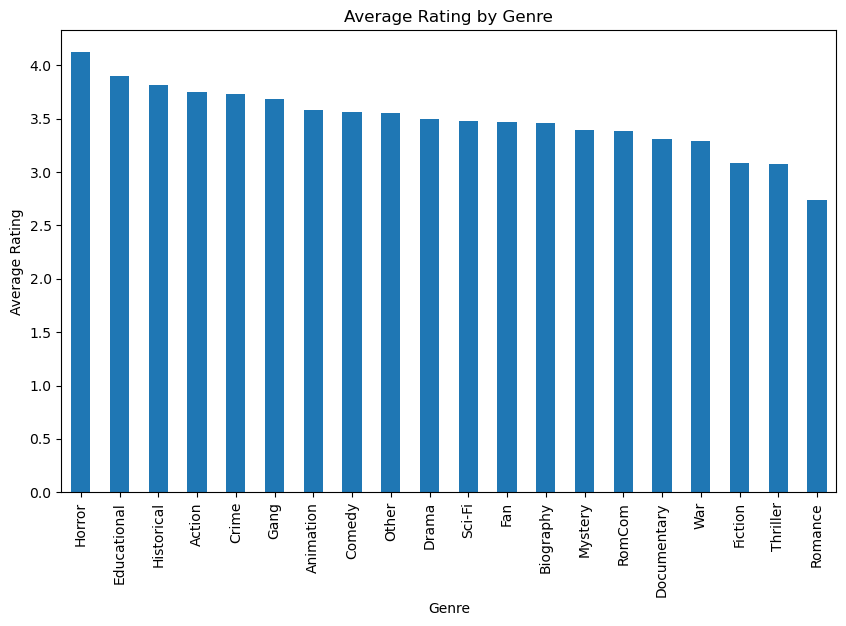

In [77]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
genre_ratings.plot(kind='bar', ax=ax)
# Set labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating by Genre')
# # Add annotations for best and worst genres
# ax.annotate(f"Best Genre: {best_genre}\nRating: {best_rating:.2f}", xy=(best_genre, best_rating),
#             xytext=(0, 5), textcoords='offset points', ha='center')
# ax.annotate(f"Worst Genre: {worst_genre}\nRating: {worst_rating:.2f}", xy=(worst_genre, worst_rating),
#             xytext=(0, -20), textcoords='offset points', ha='center')

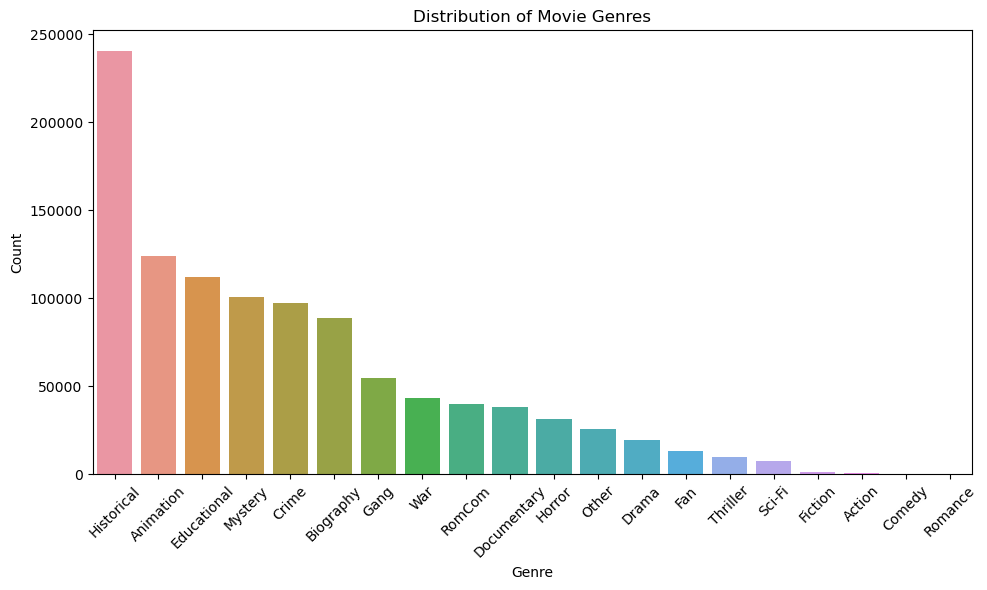

In [80]:
# Count the frequency of each genre
genre_counts = dataset['Genre'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.tight_layout()
plt.show()